# <center>Tugas Besar - Kecerdasan Artifisial</center>

## **Topik**
* Klasifikasi Dataset: Wholesale Customer
* Metode: KNN(K-Nearest Neighbour)

## **Anggota**
1. Ajax Falak Santoso (1301223125)
2. Claintont Suyanto (1301220364)
3. Viorano Arcgis Octara (1301223431)

## **Pendahuluan dan Paparan Data**
Pada tugas ini, digunakan dataset "Wholesale customers" dari UCI Machine Learning Repository untuk mengklasifikasikan pelanggan berdasarkan "Channel," yang terbagi menjadi 2 class yaitu Horeca (Hotel,Restaurant/Cafe) dan Retail menggunakan informasi pembelian grosir. Dataset mencakup variabel seperti Channel, Region, dan berbagai kategori produk (Fresh, Milk, Grocery, Frozen, Detergents Paper, Delicassen).


### **Rumusan Masalah**
Tujuan utama penelitian ini adalah mengklasifikasikan pelanggan ke dalam dua kategori (Channel: Horeca atau Retail) berdasarkan data pembeliannya, seperti Fresh, Milk, Grocery, Frozen, Detergent_Paper, dan Delicassen.

### **Paparan, Statistik, dan Dataset**
Dataset yang digunakan diambil dari UCI Machine Learning Repository pada tautan berikut:
Wholesale Customers Data.
* Statistik Dataset
Dataset memiliki 8 kolom, dengan rincian:

1. Channel (target): 2 kelas (Horeca = 1, Retail = 2).
2. Region: Terdiri dari 3 region (Lisbon, Porto, dan Other).
3. Fitur Numerik: Fresh, Milk, Grocery, Frozen, Detergent_Paper, Delicassen.

* Dataset terdiri dari 440 entri, dengan rincian:

1. Train set: 80% (352 entri).
2. Test set: 20% (88 entri).

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv")
warnings.filterwarnings('ignore')

if data.isnull().sum().any():
    raise ValueError("Dataset contains missing values. Please clean the data.")

In [20]:
display(data)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [21]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


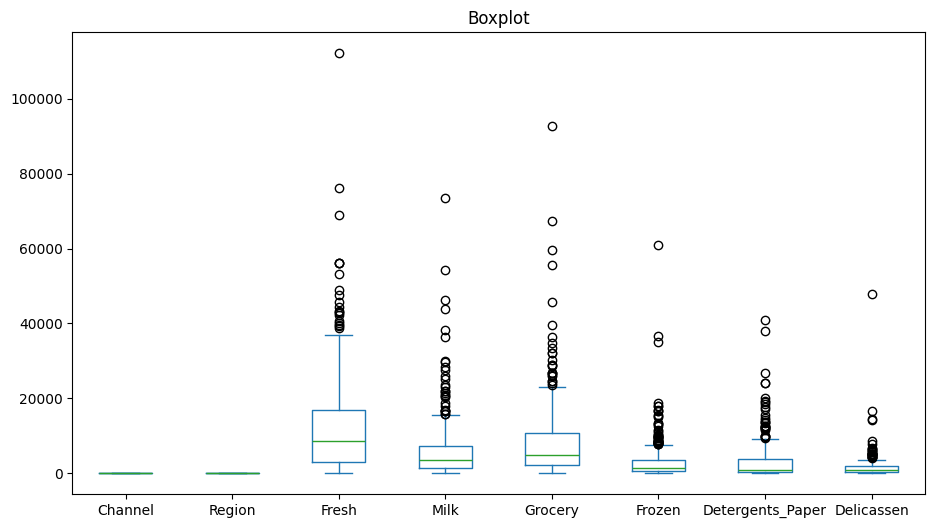

In [22]:
data.plot(kind='box', figsize=(11, 6))
plt.title('Boxplot')
plt.show()

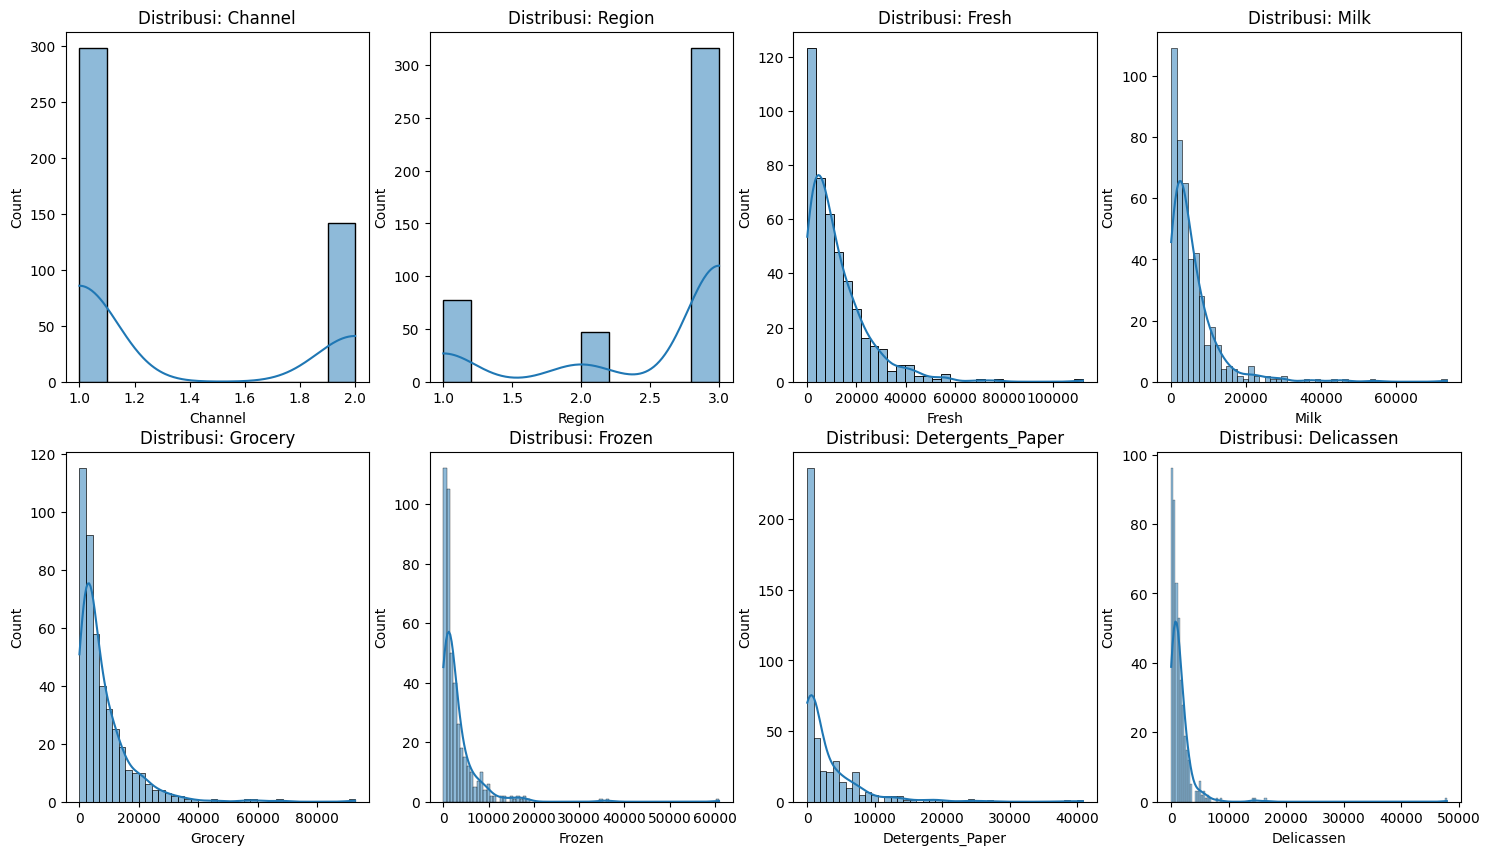

In [23]:
var_columns = data.select_dtypes(include='int').columns
plot_number = 1
num_vars = len(var_columns)
rows = (num_vars // 2) + (num_vars % 2)

plt.figure(figsize=(18, rows * 2.5))

for i in var_columns:
    plt.subplot(2, rows, plot_number)
    sns.histplot(data[i], kde=True)
    plt.title(f'Distribusi: {i}')
    plt.xlabel(i)
    plot_number += 1

plt.show()

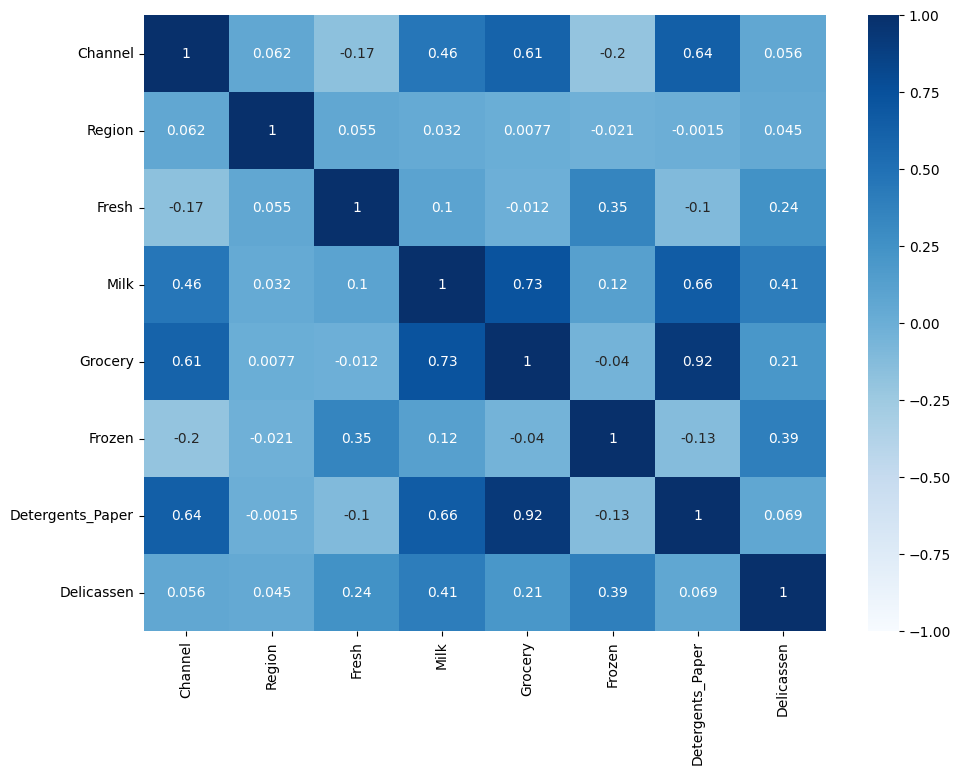

In [24]:
plt.figure(figsize=(11, 8))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')
plt.show()

### **Pre-Processing**
Pada tahap pre-processing, penghapusan outlier tidak dilakukan karena nilai ekstrem dalam dataset dianggap dapat memberikan informasi penting dalam proses klasifikasi. Sebagai gantinya, normalisasi data dilakukan menggunakan **RobustScaler** untuk mengurangi pengaruh nilai ekstrem pada distribusi data, agar model lebih stabil dan akurat tanpa perlu menghilangkan outlier.

### **Pembagian Data**
Data akan dibagi menjadi Target dan Fitur. Fitur atau variabel "Channel" akan menjadi target peng-klasifikasian sedangkan fitur atau variabel lainnya akan menjadi data fitur.
Fitur atau variabel Region akan di drop karena memiliki nilai *Categorical*. Kemudian dataset dibagi menjadi data Train dan data Test dengan perbandingan 80-20, train set(80% dari data) dan test set(20% dari data) menggunakan train_test_split.

In [25]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

X = data.drop('Channel', axis=1)
X = data.drop('Region', axis=1)
y = data['Channel']

scaler = RobustScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95, shuffle=True)

display(data)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


## **Metode dan Eksperimen**

### **Metode**
Metode atau model yang digunakan adalah KNN atau K-Nearest Neighbour. KNN digunakan karena dataset merupakan data klasifikasi. Terdapat 2 poin penting pada metode KNN.

##### **1. Matrik Jarak**
Titik terdekat dapat ditentukan menggunakan metode *euclidiean distance*, yaitu jarak antara dua buah titik. *Euclidean distance* memiliki rumus  [√Σ((x₂ - x₁)² + (y₂ - y₁)²)].

##### **2. Nilai K**
Jumlah tetangga terdekat yang digunakan untuk menentukan kelas data. Pemilihan nilai K sangat penting karena memengaruhi akurasi model. Nilai K yang terlalu kecil dapat membuat model terlalu sensitif terhadap data, sementara nilai K yang terlalu besar dapat mengaburkan batas antar kelas.

In [26]:
def euclidean_distance(a, b):
    distance = 0

    for x in range(len(a)):
        distance += pow((a[x] - b[x]), 2)

    return np.sqrt(distance)

def knn_predict(X_train, y_train, X_test, k):
    y_pred = []

    for test_point in X_test:
        distances = []

        for i, train_point in enumerate(X_train):
            distance = euclidean_distance(test_point, train_point)
            distances.append((distance, y_train.iloc[i]))

        distances.sort(key=lambda x: x[0])

        neighbors = distances[:k]

        classes = [neighbor[1] for neighbor in neighbors]
        prediction = max(set(classes), key=classes.count)
        y_pred.append(prediction)

    return np.array(y_pred)

def kfold_cross_validation(X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=95)
    k_values = range(5, 25)
    best_k = 5
    best_score = 0
    all_scores = {'accuracy': [], 'f1_score': []}

    for k in k_values:
        fold_akurasi = []
        fold_f1_scores = []

        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]

            y_val_pred = knn_predict(X_train, y_train, X_val, k)
            fold_akurasi.append(accuracy_score(y_val, y_val_pred))
            fold_f1_scores.append(f1_score(y_val, y_val_pred, average='weighted'))

        avg_akurasi = np.mean(fold_akurasi)
        avg_f1_score = np.mean(fold_f1_scores)
        all_scores['accuracy'].append(avg_akurasi)
        all_scores['f1_score'].append(avg_f1_score)

        print(f"k = {k} \t| Accuracy = {avg_akurasi:.5f}\t| F1 Score = {avg_f1_score:.5f}")

        if avg_akurasi > best_score:
            best_score = avg_akurasi
            best_k = k

    return best_k, best_score, all_scores

In [27]:
best_k, best_score, all_scores = kfold_cross_validation(X_train, y_train)
print(f"\nBest k: {best_k:.1f} with average validation accuracy: {best_score:1f}")

k = 5 	| Accuracy = 0.96579	| F1 Score = 0.96582
k = 6 	| Accuracy = 0.96298	| F1 Score = 0.96293
k = 7 	| Accuracy = 0.96298	| F1 Score = 0.96293
k = 8 	| Accuracy = 0.96869	| F1 Score = 0.96851
k = 9 	| Accuracy = 0.96298	| F1 Score = 0.96310
k = 10 	| Accuracy = 0.96016	| F1 Score = 0.95999
k = 11 	| Accuracy = 0.95734	| F1 Score = 0.95718
k = 12 	| Accuracy = 0.95734	| F1 Score = 0.95718
k = 13 	| Accuracy = 0.95730	| F1 Score = 0.95737
k = 14 	| Accuracy = 0.95730	| F1 Score = 0.95737
k = 15 	| Accuracy = 0.95730	| F1 Score = 0.95737
k = 16 	| Accuracy = 0.95445	| F1 Score = 0.95442
k = 17 	| Accuracy = 0.95730	| F1 Score = 0.95737
k = 18 	| Accuracy = 0.95445	| F1 Score = 0.95442
k = 19 	| Accuracy = 0.95445	| F1 Score = 0.95442
k = 20 	| Accuracy = 0.95163	| F1 Score = 0.95129
k = 21 	| Accuracy = 0.95449	| F1 Score = 0.95424
k = 22 	| Accuracy = 0.95730	| F1 Score = 0.95705
k = 23 	| Accuracy = 0.95734	| F1 Score = 0.95715
k = 24 	| Accuracy = 0.95453	| F1 Score = 0.95426

Best

### **Pengukuran Kinerja**
* Akurasi: Mengukur proporsi prediksi yang benar terhadap keseluruhan prediksi menggunakan accuracy_score.
*  Precision: Mengukur proporsi prediksi positif yang benar terhadap semua prediksi positif menggunakan precision_score.
*  F1 Score: Menghitung harmonic mean dari precision dan recall, memberikan gambaran yang lebih seimbang antara keduanya, dihitung menggunakan f1_score.
* Confusion Matrix: Menampilkan jumlah prediksi yang benar dan salah untuk setiap kelas.
* Classification Report: Menyediakan rangkuman lebih lengkap mengenai precision, recall, f1 score untuk setiap kelas menggunakan classification_report.

In [28]:
y_test_pred = knn_predict(X_train, y_train, X_test, best_k)

print(f"Accuracy: {accuracy_score(y_test, y_test_pred) * 100:.1f}% atau {accuracy_score(y_test, y_test_pred)}")
print(f"Precision: {precision_score(y_test, y_test_pred, average='weighted') * 100:.1f}% atau {precision_score(y_test, y_test_pred, average='weighted')}")
print(f"f1_score: {f1_score(y_test, y_test_pred, average='weighted') * 100:.1f} % atau {f1_score(y_test, y_test_pred, average='weighted')}")
print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report")
print(classification_report(y_test, y_test_pred))

Accuracy: 98.9% atau 0.9886363636363636
Precision: 98.9% atau 0.9888392857142857
f1_score: 98.9 % atau 0.9886001386001385

Confusion Matrix
[[55  0]
 [ 1 32]]

Classification Report
              precision    recall  f1-score   support

           1       0.98      1.00      0.99        55
           2       1.00      0.97      0.98        33

    accuracy                           0.99        88
   macro avg       0.99      0.98      0.99        88
weighted avg       0.99      0.99      0.99        88



### **Parameter**
* Nilai K Optimal: Dicari menggunakan K-Fold Cross-Validation dengan nilai K dari 5 hingga 25.
* Data Training dan Testing: Pembagian data menggunakan train_test_split dengan 80% untuk training dan 20% untuk testing.

## **Hasil dan Analisis**

### **Training**

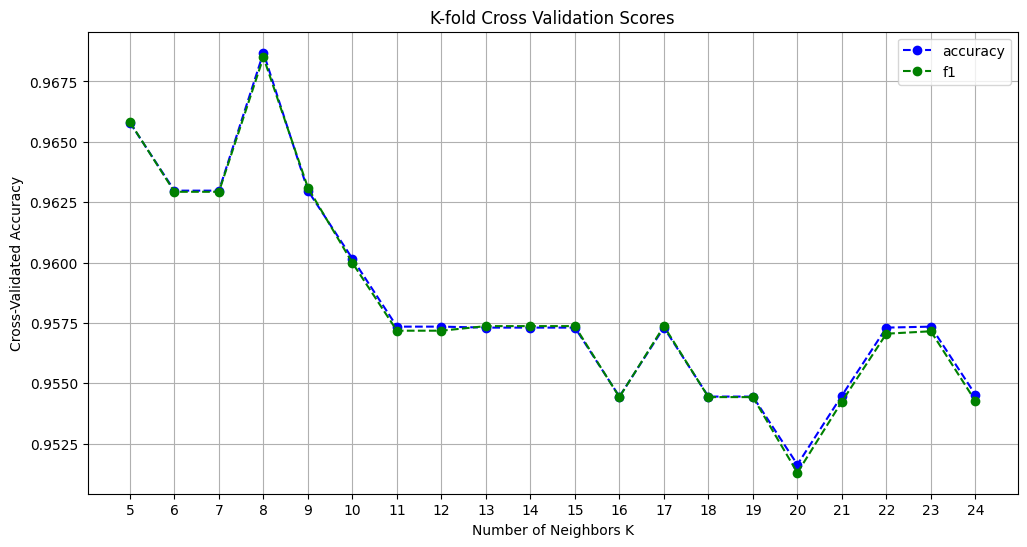

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(range(5, 25), all_scores['accuracy'], marker='o', linestyle='--', color='b')
plt.plot(range(5, 25), all_scores['f1_score'], marker='o', linestyle='--', color='g')
plt.title('K-fold Cross Validation Scores')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.legend(['accuracy', 'f1'])
plt.xticks(range(5, 25))
plt.grid(True)
plt.show()

In [30]:
best_k, best_score, all_scores = kfold_cross_validation(X_train, y_train)
print(f"\nBest k: {best_k:.1f} with average validation accuracy: {best_score:1f}")

k = 5 	| Accuracy = 0.96579	| F1 Score = 0.96582
k = 6 	| Accuracy = 0.96298	| F1 Score = 0.96293
k = 7 	| Accuracy = 0.96298	| F1 Score = 0.96293
k = 8 	| Accuracy = 0.96869	| F1 Score = 0.96851
k = 9 	| Accuracy = 0.96298	| F1 Score = 0.96310
k = 10 	| Accuracy = 0.96016	| F1 Score = 0.95999
k = 11 	| Accuracy = 0.95734	| F1 Score = 0.95718
k = 12 	| Accuracy = 0.95734	| F1 Score = 0.95718
k = 13 	| Accuracy = 0.95730	| F1 Score = 0.95737
k = 14 	| Accuracy = 0.95730	| F1 Score = 0.95737
k = 15 	| Accuracy = 0.95730	| F1 Score = 0.95737
k = 16 	| Accuracy = 0.95445	| F1 Score = 0.95442
k = 17 	| Accuracy = 0.95730	| F1 Score = 0.95737
k = 18 	| Accuracy = 0.95445	| F1 Score = 0.95442
k = 19 	| Accuracy = 0.95445	| F1 Score = 0.95442
k = 20 	| Accuracy = 0.95163	| F1 Score = 0.95129
k = 21 	| Accuracy = 0.95449	| F1 Score = 0.95424
k = 22 	| Accuracy = 0.95730	| F1 Score = 0.95705
k = 23 	| Accuracy = 0.95734	| F1 Score = 0.95715
k = 24 	| Accuracy = 0.95453	| F1 Score = 0.95426

Best

Nilai K optimal ditentukan melalui proses K-Fold Cross-Validation menggunakan data training. Dalam eksperimen ini, data dibagi menjadi 5 lipatan (folds), di mana setiap lipatan bergantian menjadi data validasi sementara lipatan lainnya digunakan sebagai data pelatihan. Proses ini dilakukan untuk menguji nilai K pada rentang tertentu (K=5 hingga K=25). Hasil menunjukkan bahwa nilai K optimal adalah 8, dengan rata-rata akurasi terbaik sebesar 96%. Proses validasi ini penting untuk memastikan bahwa model memiliki kemampuan generalisasi yang baik sebelum diterapkan pada data test.

### **Testing**

In [31]:
y_test_pred = knn_predict(X_train, y_train, X_test, best_k)

print(f"Accuracy: {accuracy_score(y_test, y_test_pred) * 100:.1f}% atau {accuracy_score(y_test, y_test_pred)}")
print(f"Precision: {precision_score(y_test, y_test_pred, average='weighted') * 100:.1f}% atau {precision_score(y_test, y_test_pred, average='weighted')}")
print(f"f1_score: {f1_score(y_test, y_test_pred, average='weighted') * 100:.1f} % atau {f1_score(y_test, y_test_pred, average='weighted')}")
print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report")
print(classification_report(y_test, y_test_pred))

Accuracy: 98.9% atau 0.9886363636363636
Precision: 98.9% atau 0.9888392857142857
f1_score: 98.9 % atau 0.9886001386001385

Confusion Matrix
[[55  0]
 [ 1 32]]

Classification Report
              precision    recall  f1-score   support

           1       0.98      1.00      0.99        55
           2       1.00      0.97      0.98        33

    accuracy                           0.99        88
   macro avg       0.99      0.98      0.99        88
weighted avg       0.99      0.99      0.99        88



Setelah mendapatkan nilai K optimal (K = 8), model diuji pada data test untuk mengevaluasi performanya secara objektif. Pada tahap ini, model KNN menghasilkan metrik evaluasi berikut:

Akurasi: 98.9%, menunjukkan bahwa hampir 100% prediksi model sesuai dengan label sebenarnya.
F1 Score: 98.9%, mencerminkan keseimbangan antara precision dan recall pada model.
Precision: 98.9%, menunjukkan bahwa sebagian besar prediksi positif model adalah benar.

## **Kesimpulan**
* Model K-Nearest Neighbors (KNN) adalah algoritma yang efektif untuk kasus klasifikasi, terutama pada dataset pelanggan wholesale.
* Proses K-Fold Cross-Validation berhasil menentukan nilai K optimal (K = 8) dengan rata-rata akurasi terbaik sebesar 96.8% pada data training.
* Pada data testing, model mencapai akurasi 98.9%, F1 Score akurasi 98.9%, dan Precision akurasi 98.9%, menunjukkan performa yang solid dalam melakukan klasifikasi.
* Metode KNN dengan parameter yang optimal memberikan hasil prediksi yang akurat dan dapat diandalkan untuk kasus ini, sehingga dapat diterapkan untuk memecahkan permasalahan klasifikasi pelanggan secara lebih luas.
